In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Standardizing the data because K-Means is distance-based
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [8]:
print("\n----- Standardized Data Sample -----")
print(X_scaled[:5])


----- Standardized Data Sample -----
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [9]:
# Determine Optimal K using Elbow Method ----
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [10]:
wcss

[600.0,
 222.36170496502308,
 191.0247368531797,
 114.35407164049776,
 91.0476699110953,
 81.55075699571758,
 80.77773933734282,
 64.4267484948227,
 55.70690047933692,
 51.12109539650554]

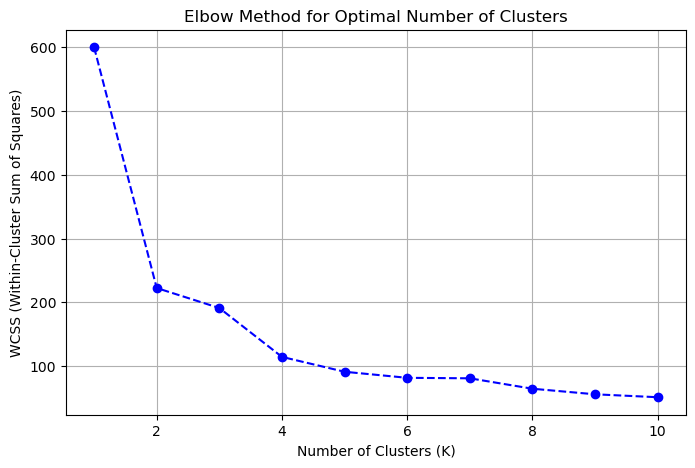


From the Elbow graph, the optimal number of clusters (K) is usually 3.


In [11]:
# Plot Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

print("\nFrom the Elbow graph, the optimal number of clusters (K) is usually 3.")

In [12]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [13]:
# Add the cluster labels to the DataFrame
df['Cluster'] = y_kmeans
print("\nClustered Data Sample")
print(df.head())


Clustered Data Sample
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  


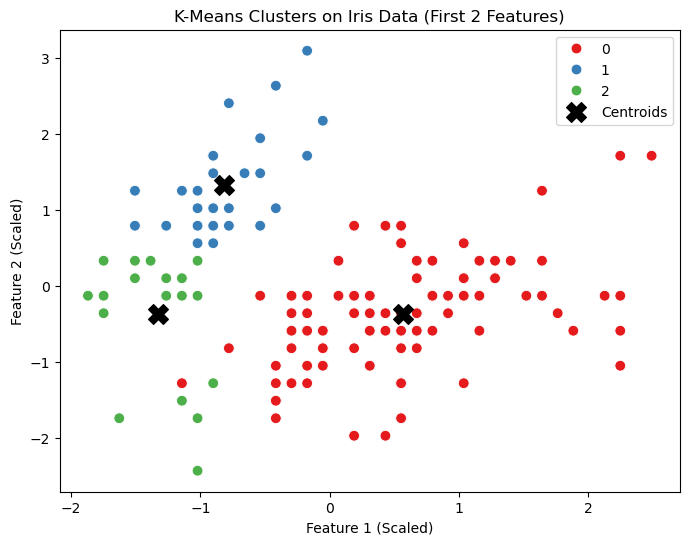

In [15]:
# ---- Visualization with Centroids ----
plt.figure(figsize=(8,6))

# Scatter plot of clusters using first two features
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=df['Cluster'],
    palette='Set1',
    s=60
)

# Plot centroids in red 'X' markers
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,            # size of centroid marker
    c='black',        # color of centroids
    marker='X',       # X-shaped marker
    label='Centroids'
)

# Labels and title
plt.title("K-Means Clusters on Iris Data (First 2 Features)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()
plt.show()


In [16]:
# ---- Step 7: Analyze Cluster Information ----
print("\n----- Cluster Counts -----")
print(df['Cluster'].value_counts())

print("\n----- Cluster Centers (Standardized) -----")
print(kmeans.cluster_centers_)


----- Cluster Counts -----
Cluster
0    96
1    33
2    21
Name: count, dtype: int64

----- Cluster Centers (Standardized) -----
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]
